In [7]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import load_model
from keras.losses import mean_absolute_error
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math
from tqdm import tqdm
from keras.utils import plot_model
import random

from LRF import LRFinder
from SGDR import SGDRScheduler
from xception import Xception

In [3]:
source_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\high_complexity'
image_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\high_complexity\\images'
data_df = pd.read_csv(os.path.join(source_dir, 'data.csv'))

In [5]:
data_df.tail()

image_name     x1     x2  \
119995                       [g]1467896735997DSC_0110.png   65.0  577.0   
119996  [g]1468824827364JPEG_20160709_115709_100066098...  120.0  542.0   
119997                       [g]1477117397088DSC_7836.png  121.0  594.0   
119998                              [g]14797216864852.png   40.0  571.0   
119999          [g]JPEG_20161124_192322_1000270371652.png   71.0  534.0   

           y1     y2  
119995   35.0  411.0  
119996   87.0  427.0  
119997   32.0  451.0  
119998  102.0  409.0  
119999  164.0  339.0

In [6]:
def show_img_with_rect(img, lab):
    x1 = int(lab[0])
    x2 = int(lab[1])
    y1 = int(lab[2])
    y2 = int(lab[3]) #
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
l = []
for x in range(20):
    l.append(random.randint(0, 119999))

[h]1478967128233Soie9thNov20161078.png
[h]JPEG_20160621_112412_1000714938662.png
[g]JPEG_20161126_203313_1000850409277.png
[v]JPEG_20161207_144051_1000328581162.png
[v]1474267997569grey-ayda-cowl-neck-sweater-dress4.png
[v]JPEG_20161125_175644_1000288258915.png
[g]1467896735997DSC_0110.png
[v]JPEG_20160530_164845_1000559369029.png
1476775832685DSC_8575.png
JPEG_20161126_124757_1000561037980.png
JPEG_20160809_153245_1000919552452.png
147919150539220dresses11-11-165218.png
[h]1476794751304DSC_6507.png
[g]JPEG_20161209_141842_1000192772030.png
[h]JPEG_20161202_172408_100043403474.png
[h_v]JPEG_20161119_150528_1000265297927.png
[h_v]1473427265846DSC_4516.png
1470651716563DSC_0023.png
JPEG_20160527_162239_1000192445936.png
[g]1477127345722DSC_7557.png


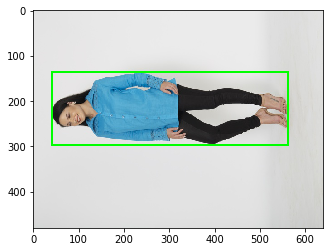

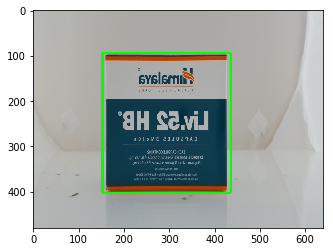

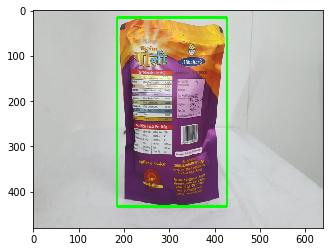

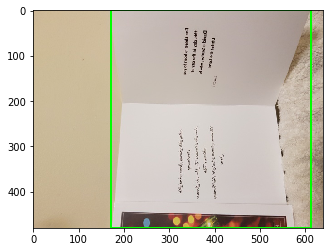

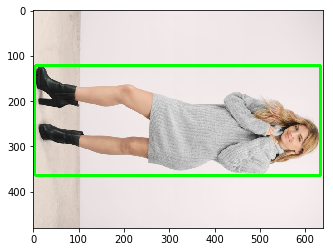

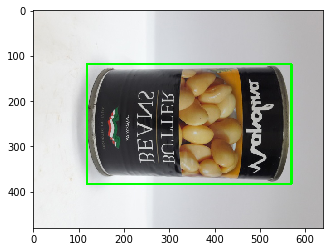

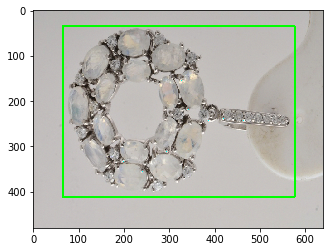

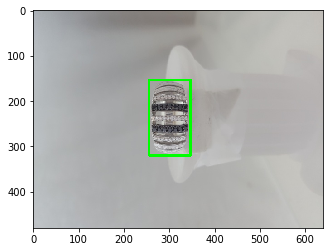

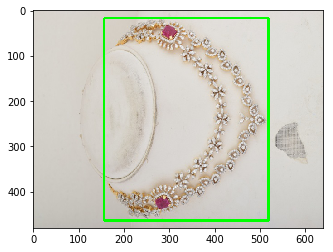

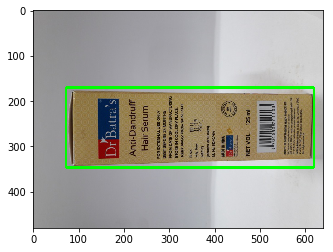

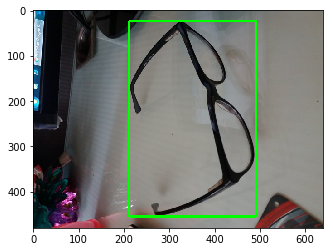

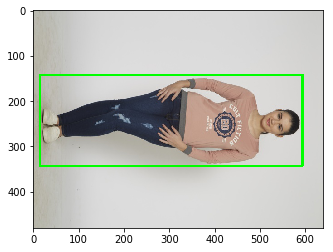

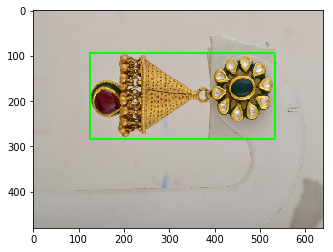

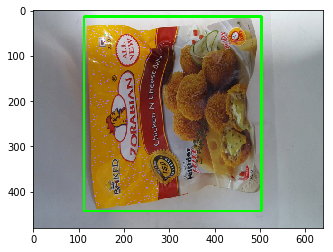

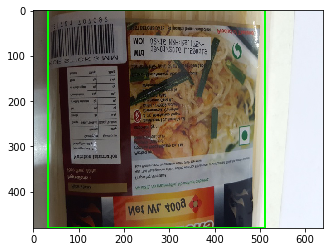

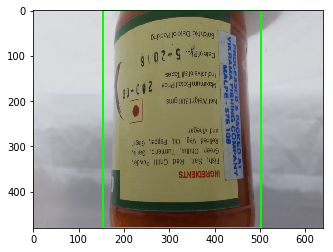

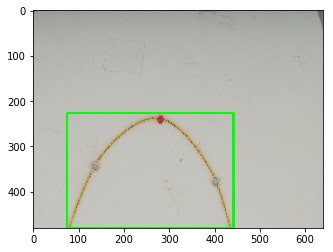

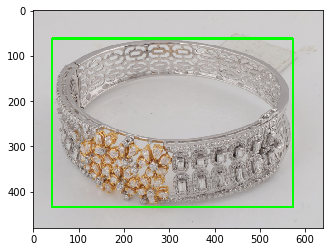

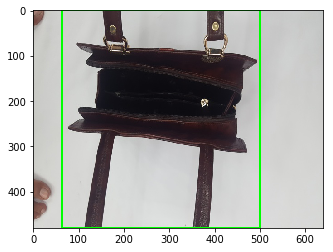

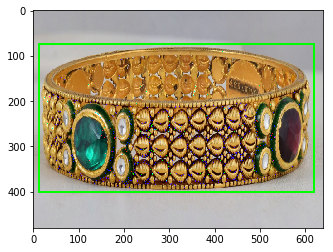

In [12]:
ctr = 0
for i in l:
    img = cv2.imread(os.path.join(image_dir, data_df.at[i, 'image_name']))
    plt.figure(ctr)
    lab = (data_df.at[i, 'x1'], data_df.at[i, 'x2'], data_df.at[i, 'y1'], data_df.at[i, 'y2'])
    show_img_with_rect(img, lab)
    print(data_df.at[i, 'image_name'])
    ctr += 1